In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import models, optimizers, regularizers

In [3]:
model = models.Sequential()

model.add(Input(shape=(150, 150, 3)))
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True  
)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator=train_datagen.flow_from_directory('/kaggle/input/cnn-data-sources/cats_and_dogs/train',
                                target_size=(150,150),
                                batch_size=32,
                                class_mode='binary'
                                )

validation_generator=test_datagen.flow_from_directory('/kaggle/input/cnn-data-sources/cats_and_dogs/validation',
                                target_size=(150,150),
                                batch_size=32,
                                class_mode='binary'
                                )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
checkpoint = ModelCheckpoint('./modelo_perros_gatos.keras', monitor='val_accuracy', verbose=1, save_best_only=True)

In [17]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(),
             metrics=['accuracy'])

In [18]:
hist = model.fit(train_generator, steps_per_epoch=2000//32,
                epochs=100,
                validation_data=validation_generator,
                validation_steps=100//32,
                callbacks=[checkpoint]
                )

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.7421 - loss: 0.5276
Epoch 1: val_accuracy improved from -inf to 0.72917, saving model to ./modelo_perros_gatos.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 22s 258ms/step - accuracy: 0.7423 - loss: 0.5274 - val_accuracy: 0.7292 - val_loss: 0.5698
Epoch 2/100
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6875 - loss: 0.5701
Epoch 2: val_accuracy improved from 0.72917 to 0.80208, saving model to ./modelo_perros_gatos.keras


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6875 - loss: 0.5701 - val_accuracy: 0.8021 - val_loss: 0.4170
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.7694 - loss: 0.4900
Epoch 3: val_accuracy did not improve from 0.80208
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.7693 - loss: 0.4901 - val_accuracy: 0.8021 - val_loss: 0.4088
Epoch 4/100
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7500 - loss: 0.5197
Epoch 4: val_accuracy did not improve from 0.80208
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7500 - loss: 0.5197 - val_accuracy: 0.8021 - val_loss: 0.4545
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.7593 - loss: 0.4913
Epoch 5: val_accuracy did not improve from 0.80208
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.7593 - loss: 0.4915 - val_accuracy: 0.7604 - val_loss: 0.4784
Epoch 6/100
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7500 - loss: 0.5454
Epoch 6: val_accuracy improved from

In [19]:
import matplotlib.pyplot as plt

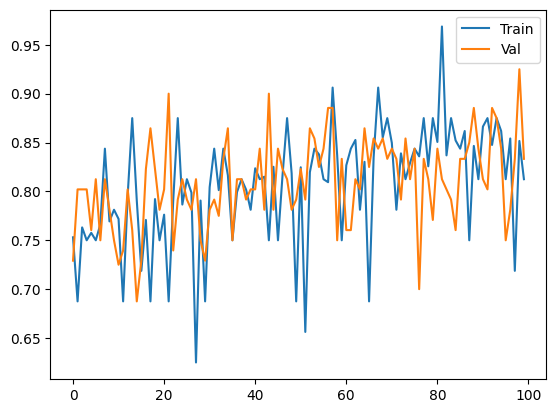

In [20]:
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Val')
plt.legend()
plt.show()

In [21]:
test_generator=test_datagen.flow_from_directory('/kaggle/input/cnn-data-sources/cats_and_dogs/test',
                                target_size=(150,150),
                                batch_size=32,
                                class_mode='binary'
                                )

Found 1000 images belonging to 2 classes.


In [23]:
model2=model

In [24]:
model2.load_weights('/kaggle/working/modelo_perros_gatos.keras')

In [25]:
model2.evaluate(test_generator)

 2/32 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.8047 - loss: 0.3868 

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 238ms/step - accuracy: 0.8439 - loss: 0.3694


[0.4010762572288513, 0.8389999866485596]